In [1]:
# -------- Code Outline -------- #
# Code splits the de-noised data into segments. Each segment will contain three heartbeats
# As result of CAs, these will be beats of different lengths depending on the heart rate at that time
# In order to do this we will segment the ecg such that
# the segment starts 1/3rd way back to prior peak and ends at 2/3rd way to the fourth peak
# The segment will be labelled same as last occuring rhythm label
# If segment window contains a change of label, segment is void and next segment 
# will begin from the new rhythm label type

import numpy as np
import matplotlib.pyplot as plt 
import pickle as pkl

In [2]:
names = [100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,
        203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234]

# For each patient
for i,name in enumerate(names):
    print('patient ', i)
    # Load in the peaks
    with open('Data Extraction/adb final labels/adb peaks/{}_peaks.pkl'.format(i), 'rb') as f:
        peaks = pkl.load(f)
    # Load in the de-noised data
    with open('De-Noised Data/adb de-noised/{}_de-noised.pkl'.format(i), 'rb') as f:
        data = pkl.load(f)
    # Load in the rhythm labels and their positions
    with open('Data Extraction/adb final labels/adb rhythm labels/{}_rhythm_labels.pkl'.format(i), 'rb') as f:
        labels = pkl.load(f)
    with open('Data Extraction/adb final labels/adb rhythm locations/{}_rhythm_locations.pkl'.format(i), 'rb') as f:
        label_locs = pkl.load(f)

    print(labels)
    print(label_locs)

    # -------- Segmentation -------- #
    # Split the beats up into segments based on the peak array

    # Find the 2/3rd point of the first peak distance
    # Starting from the 2/3rd point of the previous interval
    # and ending at 2/3rd of the next interval after 3 peaks have passed

    # First find label and its position, locating the closest peak after it

    initial_pos = 0
    end_pos = 0
    peak_index = 0
    label_counter = 0
    segments = []
    seg_labels = []

    first_seg = False
    end_of_file = False
    final_label = False

    while(not end_of_file):
        current_label = labels[label_counter]
        current_label_loc = label_locs[label_counter]
        # Check if current label is final label in file
        if(label_counter == len(labels) - 1):
            final_label = True
            # print('FINAL LABEL: (', labels[label_counter], label_locs[label_counter], ')')

        # If label occurs before first peak in array, increase peak_index by one because there is no prior peak
        if (current_label_loc < peaks[0]) and (first_seg == False):
            peak_index += 1
            first_seg = True

        # print('peak_index: ', peak_index)
        initial_pos = peaks[peak_index - 1] + int(round((peaks[peak_index] - peaks[peak_index - 1]) * (2/3)))
        end_pos = peaks[peak_index + 2] + int(round((peaks[peak_index + 3] - peaks[peak_index + 2]) * (2/3)))

        # print('(last label ',current_label, 'at ', current_label_loc, '), window: ', initial_pos, " -> ", end_pos)

        # Now check that new label is not in this window (before final peak)
        window_valid = True
        if (not final_label):
            next_label_loc = label_locs[label_counter + 1]
            # cycle through the 3 peaks in the window and check for new label before each
            # if label found before a certain peak, this peak will be first peak of next window
            for k in range(3):
                if (next_label_loc < peaks[peak_index]):
                    label_counter += 1
                    break
                elif (next_label_loc < peaks[peak_index + k]):
                    # print('label change in window: ', initial_pos, " -> ", end_pos)
                    # print('next label ', labels[label_counter + 1], 'at ', next_label_loc)
                    # print('occurs before peak at ', peaks[peak_index + k])
                    # now change peak index to start at the next peak after the new label
                    peak_index = peak_index + k
                    label_counter += 1
                    window_valid = False
                    break
        # print(window_valid)
        
        # save segment if no change in label within window
        if(window_valid == True):
            seg = data[initial_pos:end_pos, :]
            # Split the data into segmented chunks
            segments.append(seg)
            seg_labels.append(labels[label_counter])
            # print('seg saved in ', initial_pos, " -> ", end_pos, 'with label', labels[label_counter])
            # set peak index to end peak
            if labels[label_counter] == 'N':
                peak_index += 3
            else:
                peak_index += 1
        # print('num segs: ', len(segments))
        # Loop over all the beats, splitting into segments
        # Do this until every peak has been covered (every beat)

        # check for end of file
        if(peak_index + 4 > len(peaks)):
            end_of_file = True
    
    print(len(segments))
    print(len(seg_labels))
    from collections import Counter
    print(Counter(seg_labels))
    # save the segments and labels of each patient as we loop through each patient
    with open('Segmented Data/3 Beat Segments/{}_segs.pkl'.format(i), 'wb') as f:
        print('saved ', i)
        pkl.dump(segments, f)
    with open('Segmented Data/3 Beat Labels/{}_labels.pkl'.format(i), 'wb') as f:
        pkl.dump(seg_labels, f)


patient  0
['N']
[18]
757
757
Counter({'N': 757})
saved  0
patient  1
['N']
[7]
622
622
Counter({'N': 622})
saved  1
patient  2
['P', 'N', 'P', 'N', 'P']
[68, 29133, 34216, 38682, 62969]
2111
2111
Counter({'P': 2077, 'N': 34})
saved  2
patient  3
['N']
[21]
694
694
Counter({'N': 694})
saved  3
patient  4
['P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P']
[36, 22390, 23249, 32306, 33475, 54165, 56199, 58530, 59676, 64921, 66356, 69577, 82480, 99984, 115900, 129242, 146935, 151607, 155963, 158569, 160619, 170494, 174544, 178055, 180945, 183873, 186487, 194916, 196660, 203946, 205974, 208864, 210903, 213519, 215264, 217306, 218776, 228681, 230427, 233054, 234513, 540416, 541560, 589793, 590947]
1982
1982
Counter({'P': 1892, 'N': 90})
saved  4
patient  5
['N']
[67]
866
866
Counter({'N': 866})
saved  5
patient  6
['N',

1265
1265
Counter({'N': 807, 'T': 458})
saved  29
patient  30
['N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N', 'SVTA', 'N']
[84, 151724, 154347, 200042, 210347, 215793, 223855, 264111, 269683, 285337, 288832, 310721, 312955, 550895, 551843, 617455, 618068, 618287, 620305, 631897, 632869]
1153
1153
Counter({'N': 912, 'SVTA': 241})
saved  30
patient  31
['AFIB', 'VT', 'AFIB', 'T', 'AFIB', 'B', 'AFIB', 'B', 'AFIB', 'VT', 'AFIB', 'B', 'AFIB', 'B', 'AFIB', 'B', 'AFIB']
[13, 151554, 152488, 216091, 218539, 366154, 367320, 368862, 370012, 389830, 390958, 392699, 394037, 397020, 400544, 596913, 598041]
2615
2615
Counter({'AFIB': 2573, 'B': 25, 'T': 9, 'VT': 8})
saved  31
patient  32
['N']
[125]
915
915
Counter({'N': 915})
saved  32
patient  33
['N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'VT', 'N', 'B', 'N', 'VT', 'N', 'B', 'N', 'B

patient  45
['SBR']
[76]
1776
1776
Counter({'SBR': 1776})
saved  45
patient  46
['N', 'VT', 'N', 'T', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'VT', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'VT', 'N', 'VT', 'N', 'VT', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'B', 'N', 'VT', 'N', 'B', 'N']
[3, 9923, 10577, 28214, 29581, 44623, 46117, 47552, 48999, 50249, 51730, 52144, 54255, 55751, 56799, 58276, 59779, 76831, 77895, 109386, 110905, 112845, 114373, 211590, 212250, 226721, 228204, 244160, 245635, 246037, 247525, 247935, 249394, 292260, 293323, 299832, 300890, 305133, 306985, 307400, 308451, 309702, 311190, 312664, 313722, 315213, 316702, 359507, 360575, 398071, 399121, 422293, 423342, 485343, 485991, 486760, 487422, 492319, 492965, 510856, 512367, 549437, 550493, 605492, 607429, 629638, 630737, 631418, 632061, 644479, 646373]
1083
1083
Cou

In [3]:
# Pring out the number of each rhythm type

total_seg_labels = []

for i in range(47):
    with open('Segmented Data/3 Beat Labels/{}_labels.pkl'.format(i), 'rb') as f:
        seg_labels = pkl.load(f)
    for j in range(len(seg_labels)):
        total_seg_labels.append(seg_labels[j])

print('Total segs: ', len(total_seg_labels))
print('\n')
from collections import Counter
print(Counter(total_seg_labels))


Total segs:  54416


Counter({'N': 25477, 'AFIB': 11274, 'P': 7848, 'B': 2853, 'SBR': 1776, 'AFL': 1306, 'T': 1194, 'PREX': 718, 'VFL': 460, 'BII': 412, 'SVTA': 367, 'VT': 278, 'NOD': 209, 'IVR': 131, 'AB': 113})


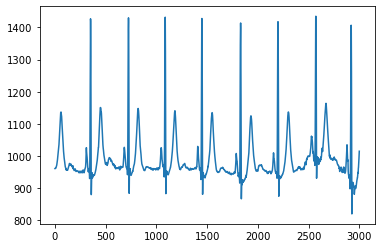

In [4]:
# Now print out data to check that the segmenting was successful

patient_num = 6
with open('De-Noised Data/adb de-noised/{}_de-noised.pkl'.format(patient_num), 'rb') as f:
    data = pkl.load(f)
with open('Segmented Data/3 Beat Segments/{}_segs.pkl'.format(patient_num), 'rb') as f:
    segments = pkl.load(f)
with open('Segmented Data/3 Beat Labels/{}_labels.pkl'.format(patient_num), 'rb') as f:
    seg_labels = pkl.load(f)
plt.plot(data[0:3000, 0])

N


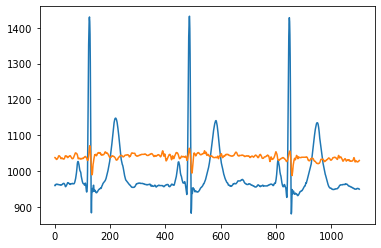

In [5]:
plt.plot(segments[0][:,:])
print(seg_labels[0])

N


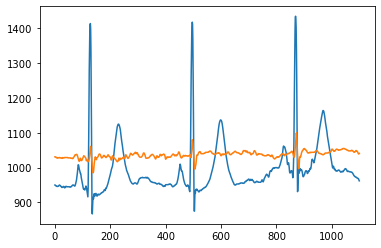

In [6]:
plt.plot(segments[1][:,:])
print(seg_labels[1])

In [7]:
print(len(segments))
print(len(seg_labels))

988
988


N


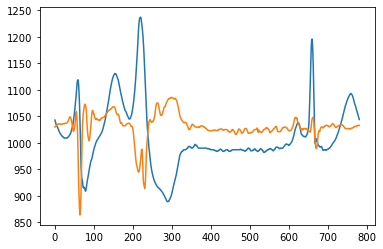

In [8]:
plt.plot(segments[64][:,:])
print(seg_labels[64])

B


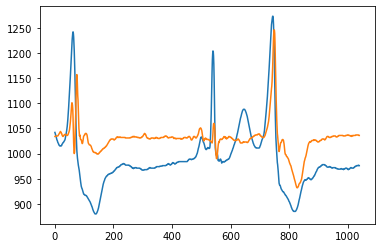

In [9]:
plt.plot(segments[65][:,:])
print(seg_labels[65])

B


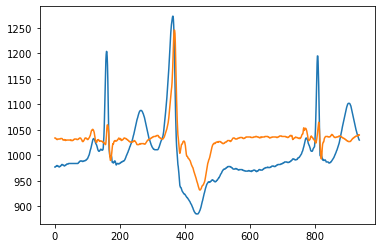

In [10]:
plt.plot(segments[66][:,:])
print(seg_labels[66])

B


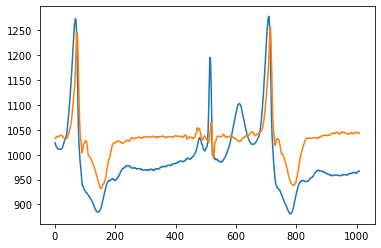

In [11]:
plt.plot(segments[67][:,:])
print(seg_labels[67])

N


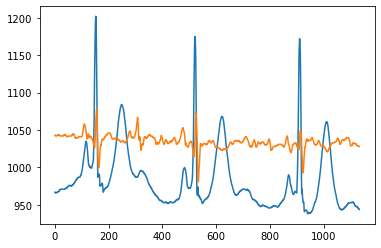

In [12]:
plt.plot(segments[68][:,:])
print(seg_labels[68])

N


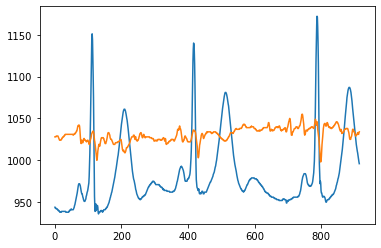

In [13]:
plt.plot(segments[69][:,:])
print(seg_labels[69])

VT


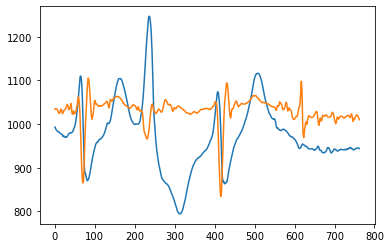

In [14]:
plt.plot(segments[70][:,:])
print(seg_labels[70])

N


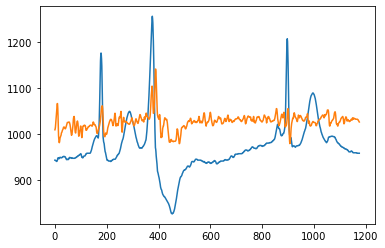

In [15]:
plt.plot(segments[71][:,:])
print(seg_labels[71])

N


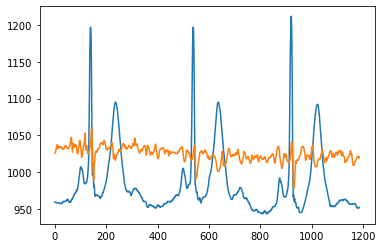

In [16]:
plt.plot(segments[72][:,:])
print(seg_labels[72])